In [1]:
from Model import Minimizer, UFloat, Levels
import numpy as np
import pandas as pd
from Model.utilities import n_, s_
from tqdm.auto import tqdm
from PlotUtils.saveToCsv import saveToCsv, getNextFilename
import re
from PlotUtils import confel

from PlotUtils import errsPlot as plt, splt

splt.set_export_folder(".")

In [2]:
n_g = 2.687e25
T_g = 300

real_value = {
    'T_e' : 2,
    'f_e' : 10**-5
}

In [3]:
data = pd.read_csv('exports/SimulatedData.csv', index_col = False).to_dict('list')

data['density'] = [ UFloat.UFloat( n, s ) for n, s in zip( data['density_n'], data['density_s'] ) ]
data['label_idx'] = Levels.Levels().namesToIdxs( data['label'] )

Initializing class Levels


In [ ]:
reps = 25
results = []

for i in tqdm( range( reps ) ):
    results.append( Minimizer.Minimizer().fit( data['density'], data['label_idx'], howmany=100 ) )

  0%|          | 0/25 [00:00<?, ?it/s]

Loaded 121 files
Loaded 82 rows


In [ ]:
saveToCsv( { 'f_e': [ x[0] for x in results ], 'T_e': [ x[1] for x in results ] }, basename = "results/avgfits" )

Saved as results/fits001


'results/fits001'

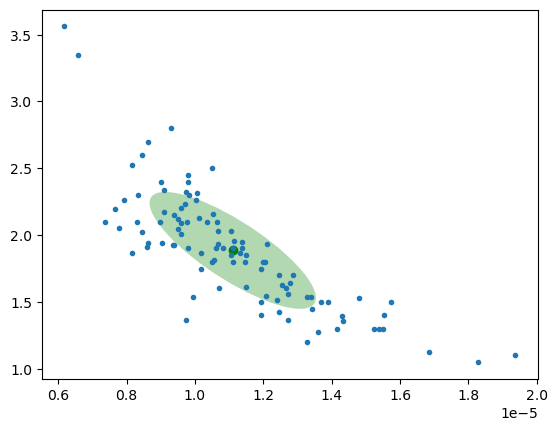

In [ ]:
plt.plot( *np.mean( results, axis = 0), 'go', label = 'Average +/- 1 std' )
confel.confidence_ellipse( results, facecolor='g' )
for x,y in results:
    plt.plot( x,y, '.', color='tab:blue' )

# plt.xlabel("f_e")
# plt.ylabel("T_e [eV]")

# splt.export( filename + "_differentresults" )